This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray CfRadial2 backend

In this example, we read CfRadial2 data files using the xarray `cfradial2` backend.

In [1]:
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import datatree as xt
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load CfRadial2 Volume Data

In [2]:
fpath = "netcdf/cfrad.20080604_002217_000_SPOL_v36_SUR_cfradial2.nc"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xt.open_datatree(f)

In [3]:
# fix: remove when available in xradar
for k in vol.groups[1:]:
    vol[k].ds = (
        vol[k]
        .ds.assign(sweep_fixed_angle=vol[k].ds.attrs["fixed_angle"])
        .swap_dims(time="azimuth")
        .sortby("azimuth")
    )

## Inspect RadarVolume

In [4]:
display(vol)

DataTree('None', parent=None)
│   Dimensions:              (sweep: 9)
│   Coordinates:
│       sweep_mode           <U20 80B ...
│       longitude            float64 8B ...
│       altitude             float64 8B ...
│       time                 datetime64[ns] 8B ...
│       latitude             float64 8B ...
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B ...
│       platform_type        <U5 20B ...
│       instrument_type      <U5 20B ...
│       primary_axis         <U6 24B ...
│       time_coverage_start  <U20 80B ...
│       time_coverage_end    <U20 80B ...
│       sweep_group_name     (sweep) <U7 252B ...
│       sweep_fixed_angle    (sweep) float64 72B ...
│   Attributes:
│       version:          2.0
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using wradlib
│       instrument_name:  None
│       fixed_angle:      0.5
│       Conventions:      Cf/Radial
├── DataTree('sweep_0')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          <U20 80B ...
│           time                (azimuth) datetime64[ns] 4kB 2008-06-04T00:15:34 ... ...
│         * range               (range) float32 4kB 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 2kB 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 2kB ...
│           longitude           float64 8B ...
│           latitude            float64 8B ...
│           altitude            float64 8B ...
│       Data variables: (12/17)
│           sweep_number        int32 4B ...
│           polarization_mode   |S32 32B ...
│           prt_mode            |S32 32B ...
│           follow_mode         |S32 32B ...
│           fixed_angle         float32 4B ...
│           target_scan_rate    float32 4B ...
│           ...                  ...
│           n_samples           (azimuth) int32 2kB ...
│           r_calib_index       (azimuth) int8 480B ...
│           scan_rate           (azimuth) float32 2kB ...
│           DBZ                 (azimuth, range) float32 2MB ...
│           VR                  (azimuth, range) float32 2MB ...
│           sweep_fixed_angle   float64 8B 0.5
│       Attributes:
│           fixed_angle:  0.5
├── DataTree('sweep_1')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          <U20 80B ...
│           time                (azimuth) datetime64[ns] 4kB 2008-06-04T00:16:21 ... ...
│         * range               (range) float32 4kB 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 2kB 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 2kB ...
│           longitude           float64 8B ...
│           latitude            float64 8B ...
│           altitude            float64 8B ...
│       Data variables: (12/17)
│           sweep_number        int32 4B ...
│           polarization_mode   |S32 32B ...
│           prt_mode            |S32 32B ...
│           follow_mode         |S32 32B ...
│           fixed_angle         float32 4B ...
│           target_scan_rate    float32 4B ...
│           ...                  ...
│           n_samples           (azimuth) int32 2kB ...
│           r_calib_index       (azimuth) int8 480B ...
│           scan_rate           (azimuth) float32 2kB ...
│           DBZ                 (azimuth, range) float32 2MB ...
│           VR                  (azimuth, range) float32 2MB ...
│           sweep_fixed_angle   float64 8B 1.1
│       Attributes:
│           fixed_angle:  1.1
├── DataTree('sweep_2')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          <U20 80B ...
│           time                (azimuth) datetime64[ns] 4kB 2008-0

## Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [5]:
vol.root

DataTree('None', parent=None)
│   Dimensions:              (sweep: 9)
│   Coordinates:
│       sweep_mode           <U20 80B ...
│       longitude            float64 8B ...
│       altitude             float64 8B ...
│       time                 datetime64[ns] 8B ...
│       latitude             float64 8B ...
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B ...
│       platform_type        <U5 20B ...
│       instrument_type      <U5 20B ...
│       primary_axis         <U6 24B ...
│       time_coverage_start  <U20 80B ...
│       time_coverage_end    <U20 80B ...
│       sweep_group_name     (sweep) <U7 252B ...
│       sweep_fixed_angle    (sweep) float64 72B ...
│   Attributes:
│       version:          2.0
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using wradlib
│       instrument_name:  None
│       fixed_angle:      0.5
│       Conventions:      Cf/Radial
├── DataTree('sweep_0')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          <U20 80B ...
│           time                (azimuth) datetime64[ns] 4kB 2008-06-04T00:15:34 ... ...
│         * range               (range) float32 4kB 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 2kB 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 2kB ...
│           longitude           float64 8B ...
│           latitude            float64 8B ...
│           altitude            float64 8B ...
│       Data variables: (12/17)
│           sweep_number        int32 4B ...
│           polarization_mode   |S32 32B ...
│           prt_mode            |S32 32B ...
│           follow_mode         |S32 32B ...
│           fixed_angle         float32 4B ...
│           target_scan_rate    float32 4B ...
│           ...                  ...
│           n_samples           (azimuth) int32 2kB ...
│           r_calib_index       (azimuth) int8 480B ...
│           scan_rate           (azimuth) float32 2kB ...
│           DBZ                 (azimuth, range) float32 2MB ...
│           VR                  (azimuth, range) float32 2MB ...
│           sweep_fixed_angle   float64 8B 0.5
│       Attributes:
│           fixed_angle:  0.5
├── DataTree('sweep_1')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          <U20 80B ...
│           time                (azimuth) datetime64[ns] 4kB 2008-06-04T00:16:21 ... ...
│         * range               (range) float32 4kB 150.0 300.0 ... 1.492e+05 1.494e+05
│         * azimuth             (azimuth) float32 2kB 0.0 0.75 1.5 ... 357.8 358.5 359.2
│           elevation           (azimuth) float32 2kB ...
│           longitude           float64 8B ...
│           latitude            float64 8B ...
│           altitude            float64 8B ...
│       Data variables: (12/17)
│           sweep_number        int32 4B ...
│           polarization_mode   |S32 32B ...
│           prt_mode            |S32 32B ...
│           follow_mode         |S32 32B ...
│           fixed_angle         float32 4B ...
│           target_scan_rate    float32 4B ...
│           ...                  ...
│           n_samples           (azimuth) int32 2kB ...
│           r_calib_index       (azimuth) int8 480B ...
│           scan_rate           (azimuth) float32 2kB ...
│           DBZ                 (azimuth, range) float32 2MB ...
│           VR                  (azimuth, range) float32 2MB ...
│           sweep_fixed_angle   float64 8B 1.1
│       Attributes:
│           fixed_angle:  1.1
├── DataTree('sweep_2')
│       Dimensions:             (azimuth: 480, range: 996)
│       Coordinates:
│           sweep_mode          <U20 80B ...
│           time                (azimuth) datetime64[ns] 4kB 2008-0

## Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [6]:
display(vol["sweep_0"])

DataTree('sweep_0', parent="None")
    Dimensions:             (azimuth: 480, range: 996)
    Coordinates:
        sweep_mode          <U20 80B ...
        time                (azimuth) datetime64[ns] 4kB 2008-06-04T00:15:34 ... ...
      * range               (range) float32 4kB 150.0 300.0 ... 1.492e+05 1.494e+05
      * azimuth             (azimuth) float32 2kB 0.0 0.75 1.5 ... 357.8 358.5 359.2
        elevation           (azimuth) float32 2kB ...
        longitude           float64 8B ...
        latitude            float64 8B ...
        altitude            float64 8B ...
    Data variables: (12/17)
        sweep_number        int32 4B ...
        polarization_mode   |S32 32B ...
        prt_mode            |S32 32B ...
        follow_mode         |S32 32B ...
        fixed_angle         float32 4B ...
        target_scan_rate    float32 4B ...
        ...                  ...
        n_samples           (azimuth) int32 2kB ...
        r_calib_index       (azimuth) int8 480B ...
        scan_rate           (azimuth) float32 2kB ...
        DBZ                 (azimuth, range) float32 2MB ...
        VR                  (azimuth, range) float32 2MB ...
        sweep_fixed_angle   float64 8B 0.5
    Attributes:
        fixed_angle:  0.5

## Georeferencing

In [7]:
swp = vol["sweep_0"].ds.copy()
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

## Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset. There are attributes connected which are defined by Cf/Radial standard.

In [8]:
display(swp.DBZ)

<xarray.DataArray 'DBZ' (azimuth: 480, range: 996)> Size: 2MB
[478080 values with dtype=float32]
Coordinates: (12/15)
    sweep_mode  <U20 80B 'azimuth_surveillance'
    time        (azimuth) datetime64[ns] 4kB 2008-06-04T00:15:34 ... 2008-06-...
  * range       (range) float32 4kB 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
  * azimuth     (azimuth) float32 2kB 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2
    elevation   (azimuth) float32 2kB 0.5164 0.5219 0.5164 ... 0.5219 0.5219
    longitude   float64 8B 120.4
    ...          ...
    y           (azimuth, range) float64 4MB 150.0 300.0 ... 1.492e+05 1.493e+05
    z           (azimuth, range) float64 4MB 46.35 47.71 ... 2.714e+03 2.718e+03
    gr          (azimuth, range) float64 4MB 150.0 300.0 ... 1.492e+05 1.494e+05
    rays        (azimuth, range) float32 2MB 0.0 0.0 0.0 ... 359.2 359.2 359.2
    bins        (azimuth, range) float32 2MB 150.0 300.0 ... 1.492e+05 1.494e+05
    crs_wkt     int64 8B 0
Attributes:
    long_name:             Computed Horizontal Co-polar Reflectivit
    standard_name:         equivalent_reflectivity_factor
    units:                 dBZ
    threshold_field_name:  
    threshold_value:       -9999.0
    sampling_ratio:        1.0
    grid_mapping:          grid_mapping

## Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

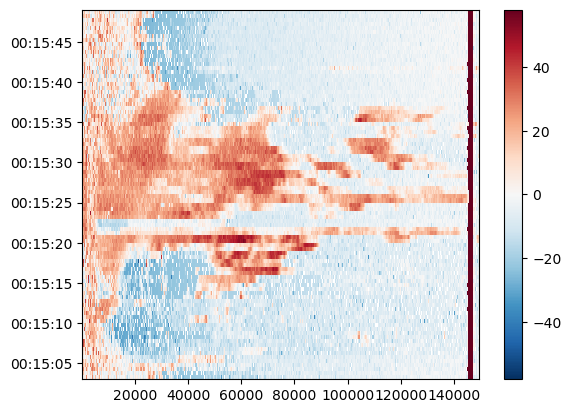

In [9]:
swp.DBZ.sortby("time").plot(x="range", y="time", add_labels=False)

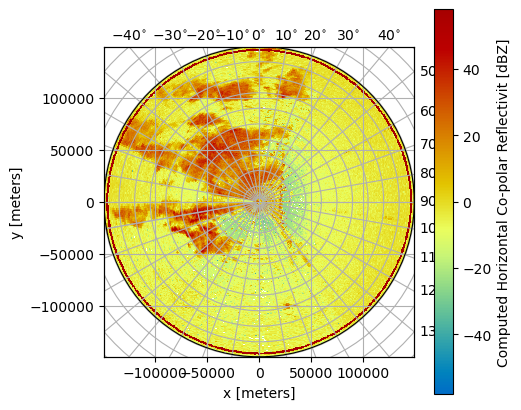

In [10]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZ.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)